In [213]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from IPython.display import Image


In [268]:
df = pd.read_csv("/home/elkanio/commentary.csv")
df.head()

,over_number,comm,score,match,year,batsman_bowler,bowler,batsman,innings_no,runs,batting_team,bowling_team,result,event
0,19.6,"Chris Morris to Axar, 1 run, widish yorker out...",172.0,rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...,2018,Chris Morris to Axar,Chris Morris,Axar,1,1.0,ind,rsa,1,runs
1,19.5,"Chris Morris to Bhuvneshwar, 3 runs, full toss...",171.0,rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...,2018,Chris Morris to Bhuvneshwar,Chris Morris,Bhuvneshwar,1,3.0,ind,rsa,1,runs
2,19.4,"Chris Morris to Karthik, <b>out</b> Lbw!! Kart...",168.0,rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...,2018,Chris Morris to Karthik,Chris Morris,Karthik,1,0.0,ind,rsa,1,out
3,19.4,"Chris Morris to Karthik, <b>wide</b>, another ...",168.0,rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...,2018,Chris Morris to Karthik,Chris Morris,Karthik,1,1.0,ind,rsa,1,runs
4,19.3,"Chris Morris to Karthik, <b>FOUR</b>, low full...",167.0,rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...,2018,Chris Morris to Karthik,Chris Morris,Karthik,1,4.0,ind,rsa,1,runs


#### Filtering By Team India Data 

In [4]:
batting_df=df[df['batting_team']=='ind']

### Matches Played by Team India 

In [5]:
match_nos=batting_df.groupby(['year']).apply(lambda x : x['match'].nunique()).reset_index(name='Number of Matches')
#batting_df.groupby(['year'])['match'].nunique().reset_index(name='Number of Matches')

In [24]:
match_nos

,year,Number of Matches
0,2018,16
1,2019,12


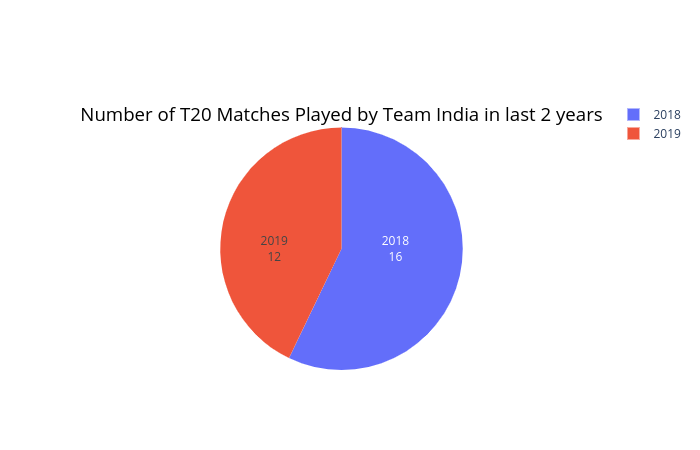

In [270]:
labels = match_nos['year']
values = match_nos['Number of Matches']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+value',
                             insidetextorientation='radial',
                            title='Number of T20 Matches Played by Team India in last 2 years',titlefont={'color':'black','size':20})])

#fig.show()

Image(filename='/home/elkanio/Indian/matches.png', width=900)


###  Innings wise Average Score

In [26]:
ininngs_one = batting_df[batting_df['innings_no']==1]
ininngs_one_total = ininngs_one.groupby('innings_no').agg({'runs':'sum'})

In [35]:
ininngs_two = batting_df[batting_df['innings_no']==2]
ininngs_two_total = ininngs_two.groupby('innings_no').agg({'runs':'sum'})


In [38]:
score = batting_df.groupby(['year','match','innings_no']).apply(lambda x:x['runs'].sum()).reset_index(name='score')
print("Batting First Average score of Team India:",np.median(score[score['innings_no']==1]['score'].values))
print("Batting Second Average score of Team India:",np.median(score[score['innings_no']==2]['score'].values))


Batting First Average score of Team India: 183.0
Batting Second Average score of Team India: 157.5


In [30]:
fst_inngs = score[score['innings_no']==1]
scnd_inngs = score[score['innings_no']==2]

In [39]:
fst_inngs_score_yrly= fst_inngs.groupby(['year']).apply(lambda x : np.median(x['score'])).reset_index(name='score')
scnd_inngs_score_yrly= scnd_inngs.groupby(['year']).apply(lambda x : np.median(x['score'])).reset_index(name='score')

In [40]:
data = {'First Innings':fst_inngs_score_yrly['score'].values,'Second Innings':scnd_inngs_score_yrly['score'].values}
index = fst_inngs_score_yrly['year']
df_yr = pd.DataFrame(data=data,index=index)

In [41]:
df_yr

,First Innings,Second Innings
year,,
2018,195.0,163.0
2019,170.0,151.0


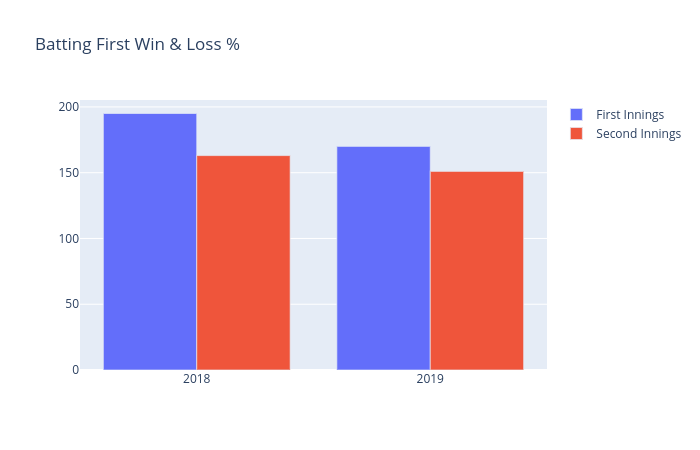

In [254]:
index = ['2018','2019']
fig= go.Figure(data=[go.Bar(name='First Innings',x=index,y=df_yr['First Innings']),
                    go.Bar(name='Second Innings',x=index,y=df_yr['Second Innings'])])

fig.update_layout(barmode='group')
fig.layout.title = 'Batting First Win & Loss %'
#fig.show()
Image(filename='/home/elkanio/Indian/bat_first.png', width=900)


#### Batting First Average score of Team India during 2018 was 195 & during Second Innings was 163 , but it came down during 2019,
#### Batting First Average score of Team India during 2019 was 170 & during Second Innings was 151

# Winnings

In [43]:
df_ind = df[df['batting_team']=='ind']

In [44]:
grp = batting_df.groupby('match').last().reset_index()
overall = grp[grp['innings_no']==grp['result']]

In [58]:
matches_won = grp[grp['innings_no'] == grp['result']]

first  = grp[grp['innings_no'] == 1]
won1 = first[first['innings_no'] == first['result']]

scnd  = grp[grp['innings_no'] == 2]
won2 = scnd[scnd['innings_no'] == scnd['result']]

In [59]:
print("Over all Winning % of Team India :",(matches_won.shape[0]/grp.shape[0])*100)
print("Batting First Winning % :",(won1.shape[0]/first.shape[0])*100)
print("Batting Second Winning % :",(won2.shape[0]/scnd.shape[0])*100)


Over all Winning % of Team India : 67.85714285714286
Batting First Winning % : 50.0
Batting Second Winning % : 85.71428571428571


### 1.  Win % against Countries

In [61]:
df1 = grp.groupby('bowling_team').apply(lambda x:x.shape[0]).reset_index(name='no')
df2=grp.groupby('bowling_team').apply(lambda x: x[x['innings_no']==x['result']].shape[0]).reset_index(name='won')
df2['won%']=(df2['won']/df1['no'])*100


### Visualising 

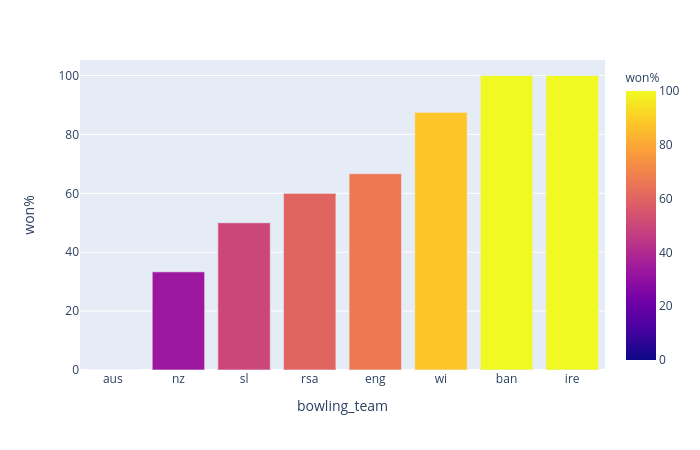

In [253]:


data_won = df2.sort_values(by='won%')
fig = px.bar(data_won, x='bowling_team', y='won%',
             hover_data=['won%'], color='won%',
             labels={'pop':'population of Canada'}, height=400)
#fig.show()
Image(filename='/home/elkanio/Indian/win.png', width=900)


#### Team India has 100% win record against Ireland & Bangladesh in past 2 years 

### 2. Win % Scoring 180 above and below

In [142]:
f = batting_df.groupby(['match','innings_no','bowling_team','result']).apply(lambda x:x['runs'].sum()).reset_index(name='score')

In [143]:
first  = f[f['innings_no'] == 1]
runs180 = first[first['score']>=180] 
runs120 = first[(first['score']>=120) & (first['score']<180)] 

In [144]:
won = runs180[runs180['innings_no']==runs180['result']].shape[0]
lost = runs180[runs180['innings_no']!=runs180['result']].shape[0]

In [145]:
won120 = runs120[runs120['innings_no']==runs120['result']].shape[0]
loss120 = runs120[runs120['innings_no']!=runs120['result']].shape[0]

In [ ]:
dat = {"Batting First Won": [won,won120],
"Batting First Lost":[lost,loss120]
}
dataF = pd.DataFrame(data=dat,index=index)

### Visualising

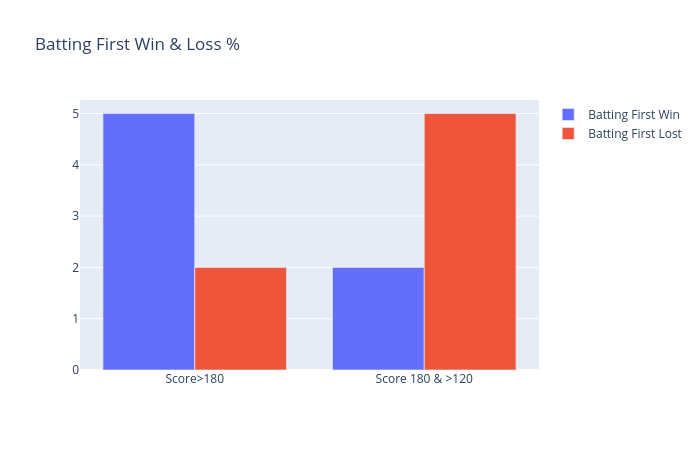

In [255]:
index = ['Score>180','Score 180 & >120']
fig= go.Figure(data=[go.Bar(name='Batting First Win',x=index,y=dataF['Batting First Won']),
                    go.Bar(name='Batting First Lost',x=index,y=dataF['Batting First Lost'])])

fig.update_layout(barmode='group')
fig.layout.title = 'Batting First Win & Loss %'
#fig.show()

Image(filename='/home/elkanio/Indian/win_range.png', width=900)



### 3.Win & Loss Over year 

In [257]:
winning_over_yr = batting_df.groupby(['match','innings_no','year','result']).first().reset_index()

In [258]:
winning_over_yr_2018 = winning_over_yr[winning_over_yr['year']==2018]
winning_over_yr_2018_win = winning_over_yr_2018[winning_over_yr_2018['innings_no']==winning_over_yr_2018['result']]
loss_over_yr_2018 = winning_over_yr_2018[winning_over_yr_2018['innings_no']!=winning_over_yr_2018['result']]

In [259]:
winning_over_yr_2019 = winning_over_yr[winning_over_yr['year']==2019]
winning_over_yr_2019_win = winning_over_yr_2019[winning_over_yr_2019['innings_no']==winning_over_yr_2019['result']]
loss_over_yr_2019 = winning_over_yr_2019[winning_over_yr_2019['innings_no']!=winning_over_yr_2019['result']]

In [260]:
win_2018 = (winning_over_yr_2018_win.shape[0]/winning_over_yr_2018.shape[0])*100
loss_2018 = (loss_over_yr_2018.shape[0]/winning_over_yr_2018.shape[0])*100

In [261]:
win_2019=(winning_over_yr_2019_win.shape[0]/winning_over_yr_2019.shape[0])*100
loss_2019=(loss_over_yr_2019.shape[0]/winning_over_yr_2019.shape[0])*100

In [262]:
da = {"Win": [win_2018,win_2019], "Lost":[loss_2018,loss_2019]}
index = [2018,2019]
d = pd.DataFrame(data=da,index=index)

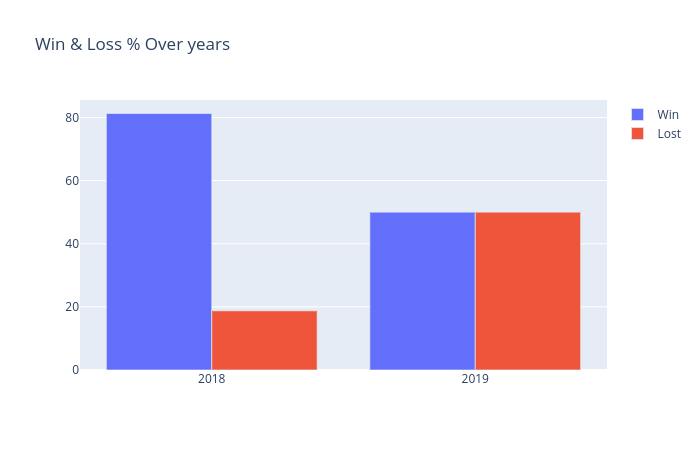

In [263]:
yer=[2018,2019]
fig=go.Figure(data=[go.Bar(name='Win',x=yer,y=d['Win']),
               go.Bar(name='Lost',x=yer,y=d['Lost'])])

fig.update_layout(barmode='group')

fig.layout.title='Win & Loss % Over years'
#fig.show()
Image(filename='/home/elkanio/Indian/win_loss.png', width=900)


## Strike Rate of Team Indian players 

In [90]:
batting_df=df[df['batting_team']=='ind']
bowling_df=df[df['bowling_team']=='ind']

#strike rate of indian team
sr=(np.sum(batting_df['runs'].values)/batting_df.shape[0])*100
print("Strike rate of Indian team:",sr)

Strike rate of Indian team: 141.7989417989418


### 1. Strike Rate Over Years 

In [195]:
strk_yr = batting_df.groupby('year').apply(lambda x : np.sum(x['runs'].values/x.shape[0])*100).reset_index(name='Strik Rate').rename(columns={'year':'Year'})
strk_yr

,Year,Strik Rate
0,2018,146.828262
1,2019,135.133288


### 2. Strike Rate  during Various Phases of Game

In [167]:
batting_df=df[df['batting_team']=='ind']


In [168]:
over_powerplay = batting_df[batting_df['over_number']<=5.6]
over_middleover = batting_df[(batting_df['over_number']>6) & (batting_df['over_number'] <14.6)]
over_deathover = batting_df[(batting_df['over_number']>15) & (batting_df['over_number'] <19.6)]


In [169]:
over_powerplay_strike = (np.sum(over_powerplay['runs'])/over_powerplay.shape[0])*100
over_middleover_strike = (np.sum(over_middleover['runs'])/over_middleover.shape[0])*100
over_deathover_strike = (np.sum(over_deathover['runs'])/over_deathover.shape[0])*100


In [172]:
d = {'Powerplay':over_powerplay_strike,'MiddleOvers':over_middleover_strike,'DeathOvers':over_deathover_strike}
index = ['Strike Rate']
df_phase = pd.DataFrame(data=d,index=index)

In [173]:
df_phase

,Powerplay,MiddleOvers,DeathOvers
Strike Rate,139.923954,132.574772,161.861075


### Visualising

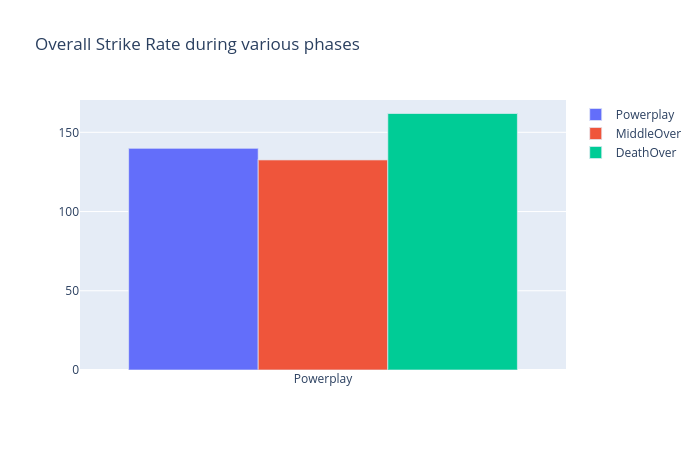

In [265]:
phase=['Powerplay','MiddleOver','DeathOver']

fig =go.Figure(data=[go.Bar(name='Powerplay',x=phase,y=df_phase['Powerplay']),
                            go.Bar(name='MiddleOver',x=phase,y=df_phase['MiddleOvers']),
                                   go.Bar(name='DeathOver',x=phase,y=df_phase['DeathOvers'])
                           
                           ])
fig.layout.title = 'Overall Strike Rate during various phases'
fig.update_layout(barmode='group')
#fig.show()
Image(filename='/home/elkanio/Indian/strike_phase.png', width=900)


### Strike Rate during various phases


In [179]:
sr_powerplay = over_powerplay.groupby('year').apply(lambda x:(np.sum(x['runs'])/x.shape[0])*100)

sr_middleover = over_middleover.groupby('year').apply(lambda x:(np.sum(x['runs'])/x.shape[0])*100)

sr_deathover = over_deathover.groupby('year').apply(lambda x:(np.sum(x['runs'])/x.shape[0])*100)

In [181]:
d = {'Powerplay':sr_powerplay,'MiddleOver':sr_middleover,'DeathOver':sr_deathover}
dd = pd.DataFrame(data=d)

In [202]:
dd

,Powerplay,MiddleOver,DeathOver
year,,,
2018,146.179402,135.591274,171.232877
2019,131.555556,128.635682,149.230769


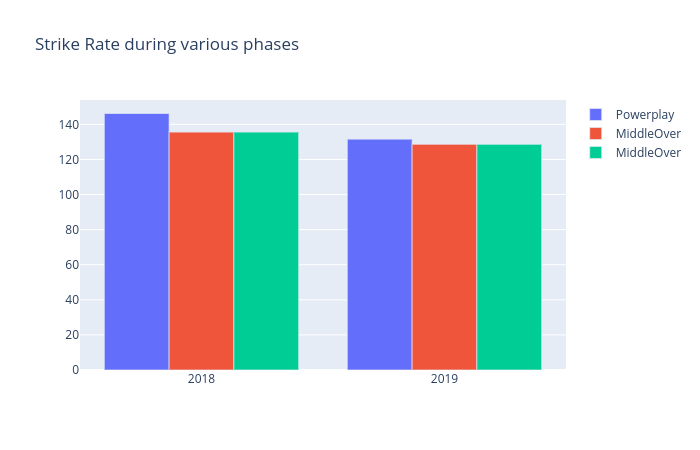

In [267]:
year=['2018','2019']

fig =go.Figure(data=[go.Bar(name='Powerplay',x=year,y=dd['Powerplay']),
                            go.Bar(name='MiddleOver',x=year,y=dd['MiddleOver']),
                                   go.Bar(name='MiddleOver',x=year,y=dd['MiddleOver'])
                           
                           ])
fig.layout.title = 'Strike Rate during various phases'
fig.update_layout(barmode='group')
#fig.show()

Image(filename='/home/elkanio/Indian/strike_phase_yr.png', width=900)


In [116]:
bowling_df=df[df['bowling_team']=='ind']


In [229]:
bowling_powerplay = bowling_df[bowling_df['over_number']<=5.6]
bowling_middleover = bowling_df[(bowling_df['over_number']>6) & (bowling_df['over_number']<14.6)]
bowling_deathover = bowling_df[(bowling_df['over_number']>15)]


### Economy Rates During phases of Game

In [118]:
bowling_powerplay_ = bowling_powerplay.groupby('match').apply(lambda x:np.sum(x['runs'])).reset_index(name="Runs in Powerplay")
bowling_middleover_ = bowling_middleover.groupby('match').apply(lambda x:np.sum(x['runs'])).reset_index(name="Runs in Middle Over")
bowling_deathover_ = bowling_deathover.groupby('match').apply(lambda x:np.sum(x['runs'])).reset_index(name="Runs in Death Over")



In [192]:
avg1=np.median(bowling_powerplay_['Runs in Powerplay'])
avg2=np.median(bowling_middleover_['Runs in Middle Over'])
avg3=np.median(bowling_deathover_['Runs in Death Over'])

In [205]:
eco_power = round(avg1/6,2)
eco_middle = round(avg2/9,2)
eco_death  = round(avg3/5,2)


In [206]:
data = {"Economy rate":[eco_power,eco_middle,eco_death] };
index = ["Powerplay", "Middle", "Last 5 overs"];

# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data, index=index)
dataFrame['Economy rate']

Powerplay       7.08
Middle          8.06
Last 5 overs    9.20
Name: Economy rate, dtype: float64

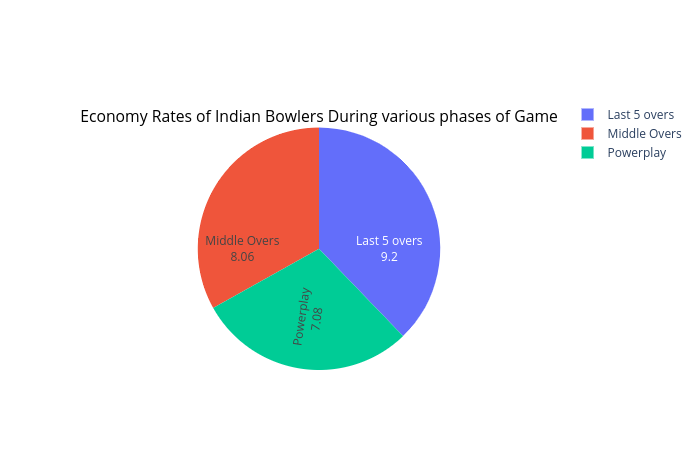

In [217]:
labels = ['Powerplay','Middle Overs','Last 5 overs']
values = dataFrame['Economy rate']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+value',
                             insidetextorientation='radial',
                            title='Economy Rates of Indian Bowlers During various phases of Game',titlefont={'color':'black','size':20})])

#fig.show()

Image(filename='/home/elkanio/Indian/avg.png', width=900)


#### Indian bowlers concede around 7-9 runs per over.

In [230]:
bowling_strk = bowling_df.shape[0] /(bowling_df[bowling_df['event']=='out'].shape[0])

In [231]:
bowling_strk

18.772222222222222

In [228]:
bowling_powerplay

20.254901960784313

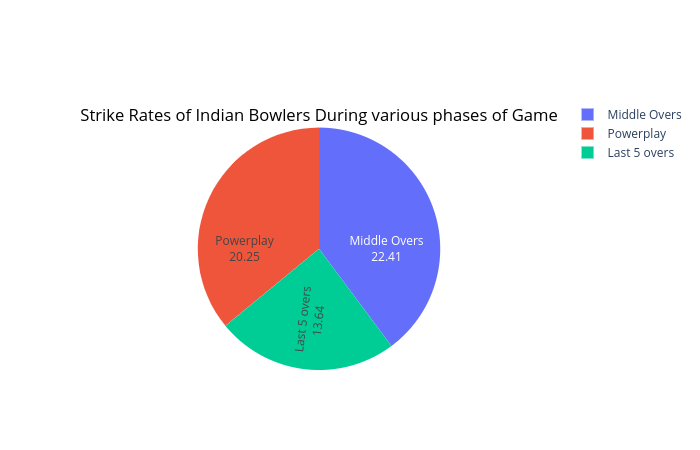

In [247]:
bowling_powerplay_strk = round(bowling_powerplay.shape[0] /(bowling_powerplay[bowling_powerplay['event']=='out'].shape[0]),2)
bowling_middleover_strk = round(bowling_middleover.shape[0] /(bowling_middleover[bowling_middleover['event']=='out'].shape[0]),2)
bowling_deathover_strk = round(bowling_deathover.shape[0] /(bowling_deathover[bowling_deathover['event']=='out'].shape[0]),2)

data = {"Strike rate":[bowling_powerplay_strk,bowling_middleover_strk,bowling_deathover_strk] };
index = ["Powerplay", "Middle", "Last 5 overs"];

# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data, index=index)


labels = ['Powerplay','Middle Overs','Last 5 overs']
values = dataFrame['Strike rate']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+value',
                             insidetextorientation='radial',
                            title='Strike Rates of Indian Bowlers During various phases of Game',titlefont={'color':'black','size':20})])

#fig.show()
Image(filename='/home/elkanio/Indian/strike.png', width=900)



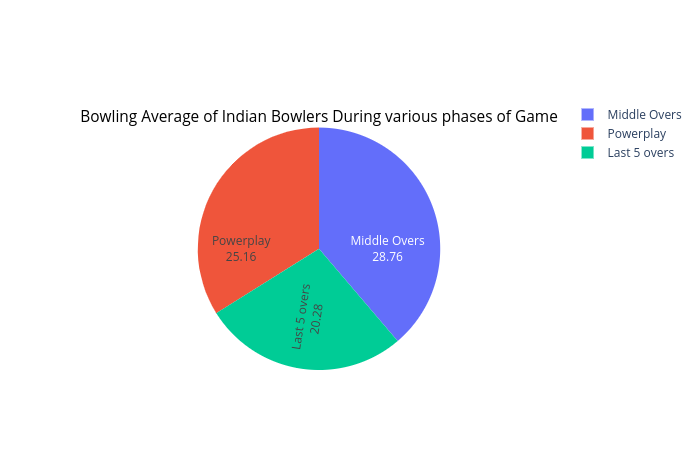

In [249]:
bowling_powerplay_avg = round(bowling_powerplay['runs'].sum() /(bowling_powerplay[bowling_powerplay['event']=='out'].shape[0]),2)
bowling_middleover_avg = round(bowling_middleover['runs'].sum() /(bowling_middleover[bowling_middleover['event']=='out'].shape[0]),2)
bowling_deathover_avg = round(bowling_deathover['runs'].sum() /(bowling_deathover[bowling_deathover['event']=='out'].shape[0]),2)

data = {"Bowling Average":[bowling_powerplay_avg,bowling_middleover_avg,bowling_deathover_avg] };
index = ["Powerplay", "Middle", "Last 5 overs"];

# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data, index=index)


labels = ['Powerplay','Middle Overs','Last 5 overs']
values = dataFrame['Bowling Average']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+value',
                             insidetextorientation='radial',
                            title='Bowling Average of Indian Bowlers During various phases of Game',titlefont={'color':'black','size':20})])

#fig.show()
Image(filename='/home/elkanio/Indian/avggg.png', width=900)



## Boundary Analysis

In [251]:
sixes = batting_df.groupby('year').apply(lambda x : x.shape[0]/x[x['runs']==6].shape[0]).reset_index(name='num_of_balls')
fours = batting_df.groupby('year').apply(lambda x: x.shape[0] / x[x['runs']==4].shape[0] ).reset_index(name='num_of_balls')

In [250]:
data = {'Fours':fours.num_of_balls.values , 'Sixes':sixes.num_of_balls.values}
index = ['2018','2019']
d_boundaries=pd.DataFrame(data=data,index=index)

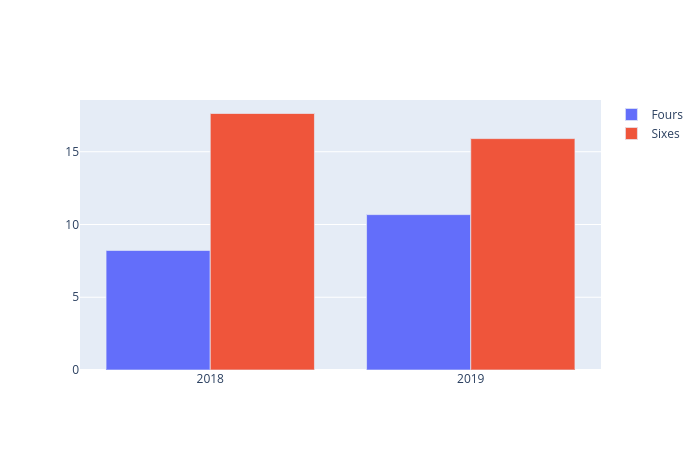

In [252]:


import plotly.graph_objects as go
years=['2018','2019']

fig = go.Figure(data=[
    go.Bar(name='Fours', x=years, y=data['Fours']),
    go.Bar(name='Sixes', x=years, y=data['Sixes'])
])
# Change the bar mode
fig.update_layout(barmode='group')
#fig.show()
Image(filename='/home/elkanio/Indian/boundary.png', width=900)


#### Indian players hit 4's every 8 balls in 2018 but in 2019 they need 10+ balls to score a four.

#### Indian players hit 6's every 18 balls in 2018 but in 2019 it improved and they need 16 balls to score a six.